<p><font size="6"><b>Spatial operations and overlays: creating new geometries</b></font></p>


> *DS Python for GIS and Geoscience*  
> *September, 2023*
>
> *© 2023, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In the previous notebook we have seen how to identify and use the spatial relationships between geometries. In this notebook, we will see how to create new geometries based on those relationships.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
countries = gpd.read_file("data/ne_110m_admin_0_countries.zip")
cities = gpd.read_file("data/ne_110m_populated_places.zip")
rivers = gpd.read_file("data/ne_50m_rivers_lake_centerlines.zip")

In [3]:
# defining the same example geometries as in the previous notebook
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].item()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].item()

## Spatial operations

Next to the spatial predicates that return boolean values, Shapely and GeoPandas also provide operations that return new geometric objects.

**Binary operations:**

<table><tr>
<td> <img src="../img/spatial-operations-base.png"/> </td>
<td> <img src="../img/spatial-operations-intersection.png"/> </td>
</tr>
<tr>
<td> <img src="../img/spatial-operations-union.png"/> </td>
<td> <img src="../img/spatial-operations-difference.png"/> </td>
</tr></table>

**Buffer:**

<table><tr>
<td> <img src="../img/spatial-operations-buffer-point1.png"/> </td>
<td> <img src="../img/spatial-operations-buffer-point2.png"/> </td>
</tr>
<tr>
<td> <img src="../img/spatial-operations-buffer-line.png"/> </td>
<td> <img src="../img/spatial-operations-buffer-polygon.png"/> </td>
</tr></table>


See https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods for more details.

For example, using the toy data from above, let's construct a buffer around Brussels (which returns a Polygon):

<Axes: >

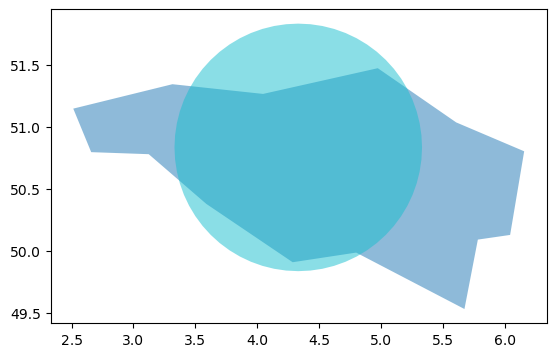

In [5]:
# 1 degree buffer because of CRS
gpd.GeoSeries([belgium, brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10')

and now take the intersection, union or difference of those two polygons:

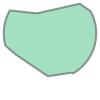

In [6]:
brussels.buffer(1).intersection(belgium)

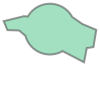

In [7]:
brussels.buffer(1).union(belgium)

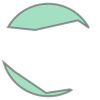

In [8]:
brussels.buffer(1).difference(belgium)

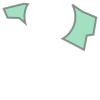

In [9]:
# Notice there's a difference between the order in which you call the command:
belgium.difference(brussels.buffer(1))

### Spatial operations with GeoPandas

Above we showed how to create a new geometry based on two individual shapely geometries. The same operations can be extended to GeoPandas. Given a GeoDataFrame, we can calculate the intersection, union or difference of each of the geometries with another geometry.

Let's look at an example with a subset of the countries. We have a GeoDataFrame with the country polygons of Africa, and  now consider a rectangular polygon, representing an area around the equator:

In [11]:
africa = countries[countries.continent == 'Africa']

africa

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
11,BDI,Burundi,Africa,11466756.0,7892.0,"POLYGON ((29.34000 -4.49998, 29.27638 -3.29391..."
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1...."
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.15447 11.94015, 1.93599 11.64115, ..."
25,BWA,Botswana,Africa,2214858.0,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."
26,CAF,Central African Rep.,Africa,5625118.0,3206.0,"POLYGON ((15.27946 7.42192, 16.10623 7.49709, ..."
31,CIV,Côte d'Ivoire,Africa,24184810.0,87120.0,"POLYGON ((-5.40434 10.37074, -4.95465 10.15271..."
32,CMR,Cameroon,Africa,24994885.0,77240.0,"POLYGON ((15.27946 7.42192, 14.77655 6.40850, ..."
33,COD,Dem. Rep. Congo,Africa,83301151.0,66010.0,"POLYGON ((23.91222 -10.92683, 23.45679 -10.867..."
34,COG,Congo,Africa,4954674.0,30270.0,"POLYGON ((12.99552 -4.78110, 12.62076 -4.43802..."


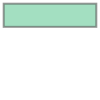

In [13]:
from shapely.geometry import LineString
box = LineString([(-10, 0), (50, 0)]).buffer(10, cap_style=3)

box

<Axes: >

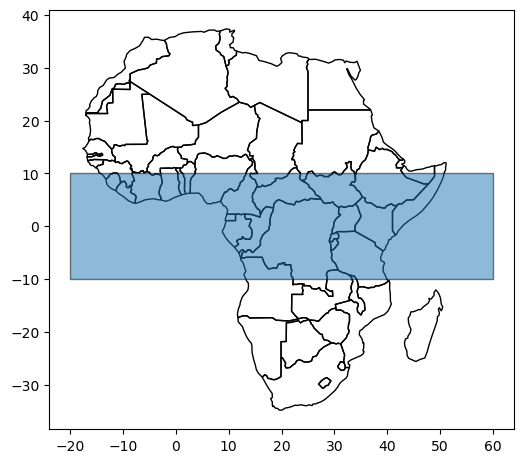

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
africa.plot(ax=ax, facecolor='none', edgecolor='k')
gpd.GeoSeries([box]).plot(ax=ax, facecolor='C0', edgecolor='k', alpha=0.5)

The intersection method of the GeoDataFrame will now calculate the intersection with the rectangle for each of the geometries of the africa GeoDataFrame element-wise. Note that for many of the countries, those that do not overlap with the rectangle, this will be an empty geometry:

In [16]:
africa_intersection = africa.intersection(box)

# Note the polygon empty
africa_intersection.head()

1     MULTIPOLYGON (((13.12099 -9.76690, 12.87537 -9...
11    POLYGON ((29.27638 -3.29391, 29.02493 -2.83926...
13    POLYGON ((1.86524 6.14216, 1.61895 6.83204, 1....
14    POLYGON ((-2.82750 9.64246, -3.51190 9.90033, ...
25                                        POLYGON EMPTY
dtype: geometry

What is returned is a new GeoSeries of the same length as the original dataframe, containing one row per country, but now containing only the intersection. In this example, the last element shown is an empty polygon, as that country was not overlapping with the box.

<Axes: >

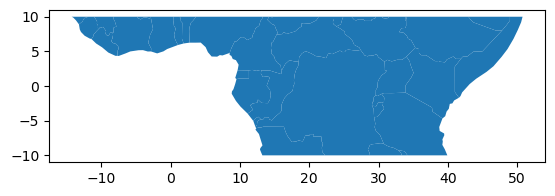

In [17]:
# remove the empty polygons before plotting
# note the special method for empty polygons
africa_intersection = africa_intersection[~africa_intersection.is_empty]
# plot the intersection
africa_intersection.plot()

## Unary union and dissolve

Another useful method is the `unary_union` attribute, which converts the set of geometry objects in a GeoDataFrame into a single geometry object by taking the union of all those geometries.

For example, we can construct a single Shapely geometry object for the Africa continent:

In [18]:
africa_countries = countries[countries['continent'] == 'Africa']

In [19]:
africa = africa_countries.unary_union

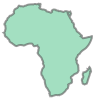

In [20]:
africa

In [21]:
print(str(africa)[:100])

MULTIPOLYGON (((-11.438779466182055 6.7859168563057475, -11.70819454593574 6.860098374860726, -12.42


Alternatively, you might want to take the unary union of a set of geometries but *grouped* by one of the attributes of the GeoDataFrame (so basically doing "groupby" + "unary_union"). For this operation, GeoPandas provides the `dissolve()` method:

In [22]:
# very useful
continents = countries.dissolve(by="continent")   # , aggfunc="sum"

In [23]:
continents

,geometry,iso_a3,name,pop_est,gdp_md_est
continent,,,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",AGO,Angola,29310273.0,189000.0
Antarctica,"MULTIPOLYGON (((-62.25539 -80.86318, -64.48813...",ATA,Antarctica,4050.0,810.0
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",AFG,Afghanistan,34124811.0,64080.0
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",ALB,Albania,3047987.0,33900.0
North America,"MULTIPOLYGON (((-156.02368 19.81422, -155.8500...",BHS,Bahamas,329988.0,9066.0
Oceania,"MULTIPOLYGON (((148.28907 -40.87544, 148.35986...",AUS,Australia,23232413.0,1189000.0
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",ATF,Fr. S. Antarctic Lands,140.0,16.0
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",ARG,Argentina,44293293.0,879400.0


<div class="alert alert-info" style="font-size:120%">

**REMEMBER**:

GeoPandas (and Shapely for the individual objects) provide a whole lot of basic methods to analyze the geospatial data (distance, length, centroid, boundary, convex_hull, simplify, transform, ....), much more than what we can touch in this tutorial.

An overview of all methods provided by GeoPandas can be found here: https://geopandas.org/en/latest/docs/reference.html


</div>

## Let's practice!

<div class="alert alert-success">

**EXERCISE 1: What are the districts close to the Seine?**

Below, the coordinates for the Seine river in the neighborhood of Paris are provided as a GeoJSON-like feature dictionary (created at http://geojson.io). 

Based on this `seine` object, we want to know which districts are located close (maximum 150 m) to the Seine. 

* Create a buffer of 150 m around the Seine.
* Check which districts intersect with this buffered object.
* Make a visualization of the districts indicating which districts are located close to the Seine.
 
</div>

In [24]:
districts = gpd.read_file("data/paris_districts.geojson").to_crs(epsg=2154)

In [25]:
# created a line with http://geojson.io
s_seine = gpd.GeoDataFrame.from_features({"type":"FeatureCollection","features":[{"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[2.408924102783203,48.805619828930226],[2.4092674255371094,48.81703747481909],[2.3927879333496094,48.82325391133874],[2.360687255859375,48.84912860497674],[2.338714599609375,48.85827758964043],[2.318115234375,48.8641501307046],[2.298717498779297,48.863246707697],[2.2913360595703125,48.859519915404825],[2.2594070434570312,48.8311646245967],[2.2436141967773438,48.82325391133874],[2.236919403076172,48.82347994904826],[2.227306365966797,48.828339513221444],[2.2224998474121094,48.83862215329593],[2.2254180908203125,48.84856379804802],[2.2240447998046875,48.85409863123821],[2.230224609375,48.867989496547864],[2.260265350341797,48.89192242750887],[2.300262451171875,48.910203080780285]]}}]},
                                               crs='EPSG:4326')

In [26]:
# convert to local UTM zone
s_seine_utm = s_seine.to_crs(epsg=2154)

<Axes: >

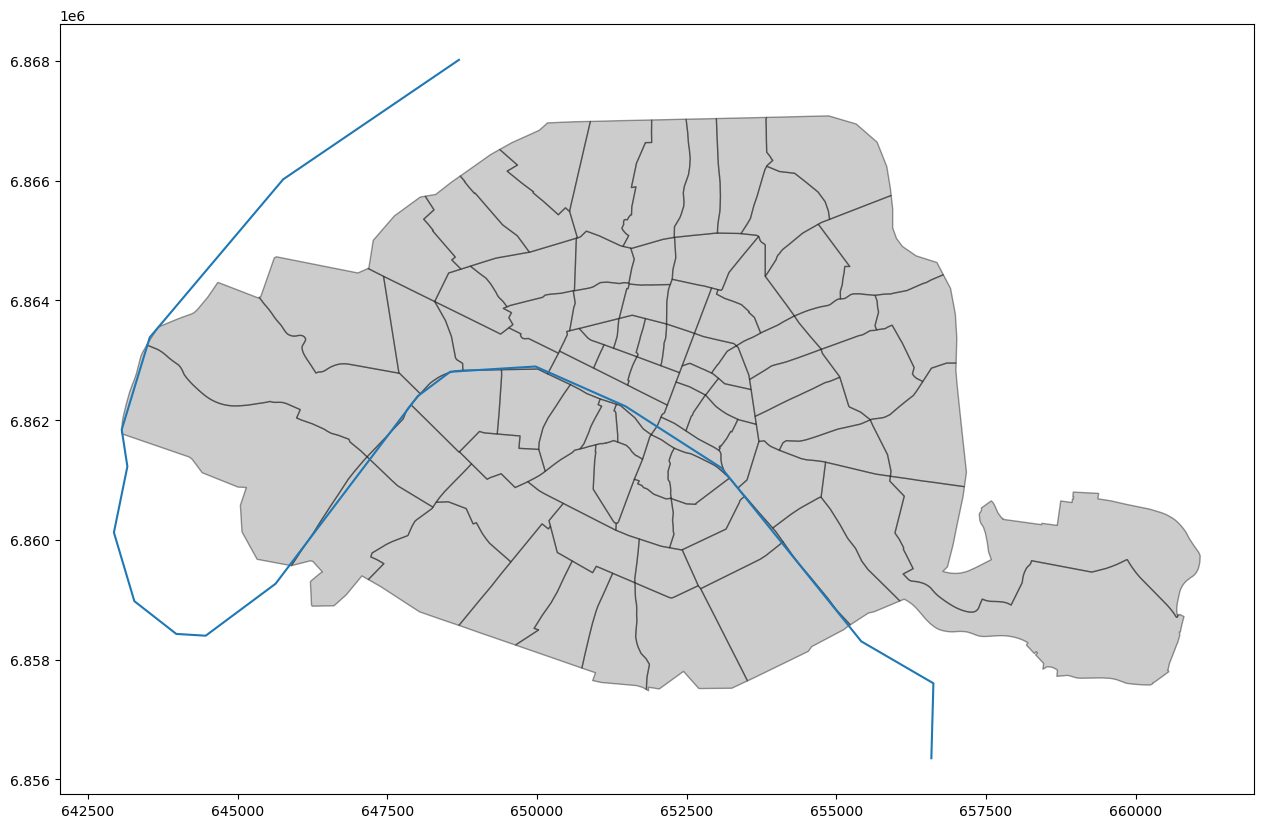

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
s_seine_utm.plot(ax=ax)

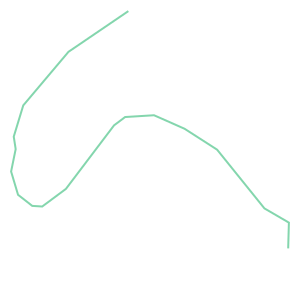

In [28]:
# access the single geometry object
seine = s_seine_utm.geometry.item()
seine

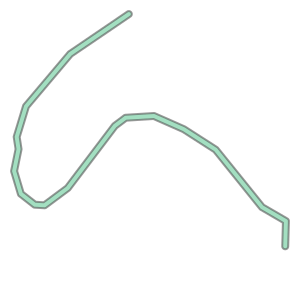

In [29]:
seine.buffer(150)

<Axes: >

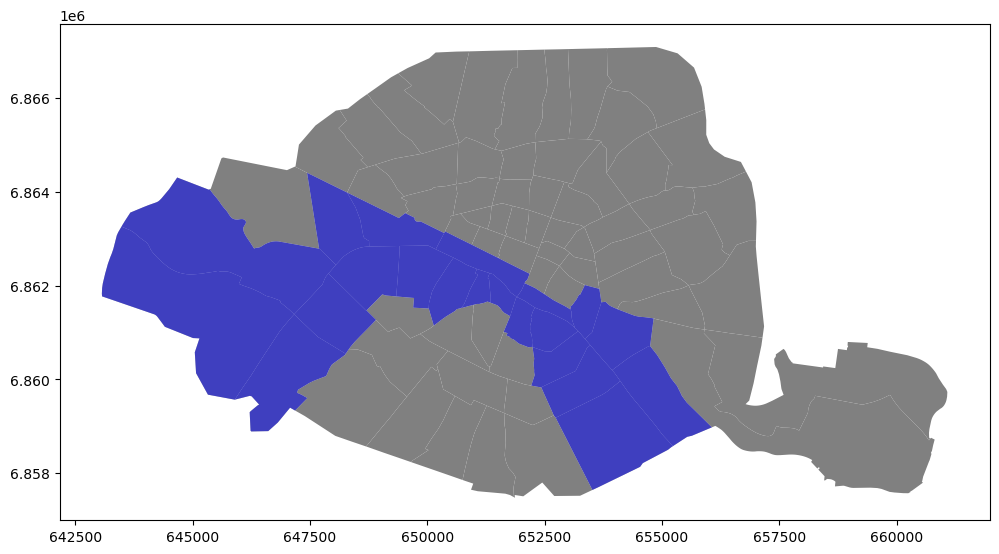

In [35]:
f, ax = plt.subplots(figsize = (12,8))
districts.plot(ax = ax, color = 'grey')
districts[districts.intersects(seine.buffer(150))].plot(ax = ax, alpha = 0.5, color = 'blue')

In [ ]:
# %load _solutions/05-spatial-operations-overlays1.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays2.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays3.py
# Make a plot
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
districts_seine.plot(ax=ax, color='blue', alpha=0.4, edgecolor='k')
s_seine_utm.plot(ax=ax)

------

<div class="alert alert-success">

**EXERCISE 2: Exploring a Land Use dataset**

For the following exercises, we first introduce a new dataset: a dataset about the land use of Paris (a simplified version based on the open European [Urban Atlas](https://land.copernicus.eu/local/urban-atlas)). The land use indicates for what kind of activity a certain area is used, such as residential area or for recreation. It is a polygon dataset, with a label representing the land use class for different areas in Paris.

In this exercise, we will read the data, explore it visually, and calculate the total area of the different classes of land use in the area of Paris.

* Read in the `'paris_land_use.shp'` file and assign the result to a variable `land_use`.
* Make a plot of `land_use`, using the `'class'` column to color the polygons. Add a legend with `legend=True`, and make the figure size a bit larger.
* Add a new column `'area'` to the dataframe with the area of each polygon.
* Calculate the total area in km² for each `'class'` using the `groupby()` method, and print the result.

<details><summary>Hints</summary>

* Reading a file can be done with the `geopandas.read_file()` function.
* To use a column to color the geometries, use the `column` keyword to indicate the column name.
* The area of each geometry can be accessed with the `area` attribute of the `geometry` of the GeoDataFrame.
* The `groupby()` method takes the column name on which you want to group as the first argument.

</details>

</div>

In [36]:
land_use = gpd.read_file('data/paris_land_use.zip')

land_use

,class,geometry
0,Water bodies,"POLYGON ((3751386.281 2890064.323, 3751395.345..."
1,Roads and associated land,"POLYGON ((3751390.345 2886000.000, 3751390.345..."
2,Roads and associated land,"POLYGON ((3751390.345 2886898.192, 3751390.370..."
3,Roads and associated land,"POLYGON ((3751390.345 2887500.000, 3751390.345..."
4,Roads and associated land,"POLYGON ((3751390.345 2888647.357, 3751390.370..."
...,...,...
3238,Green urban areas,"POLYGON ((3762500.000 2887018.698, 3762458.012..."
3239,Water bodies,"POLYGON ((3762500.000 2892386.959, 3762470.299..."
3240,Continuous Urban Fabric,"POLYGON ((3762500.000 2891470.236, 3762467.383..."
3241,Continuous Urban Fabric,"POLYGON ((3762500.000 2892463.878, 3762444.008..."


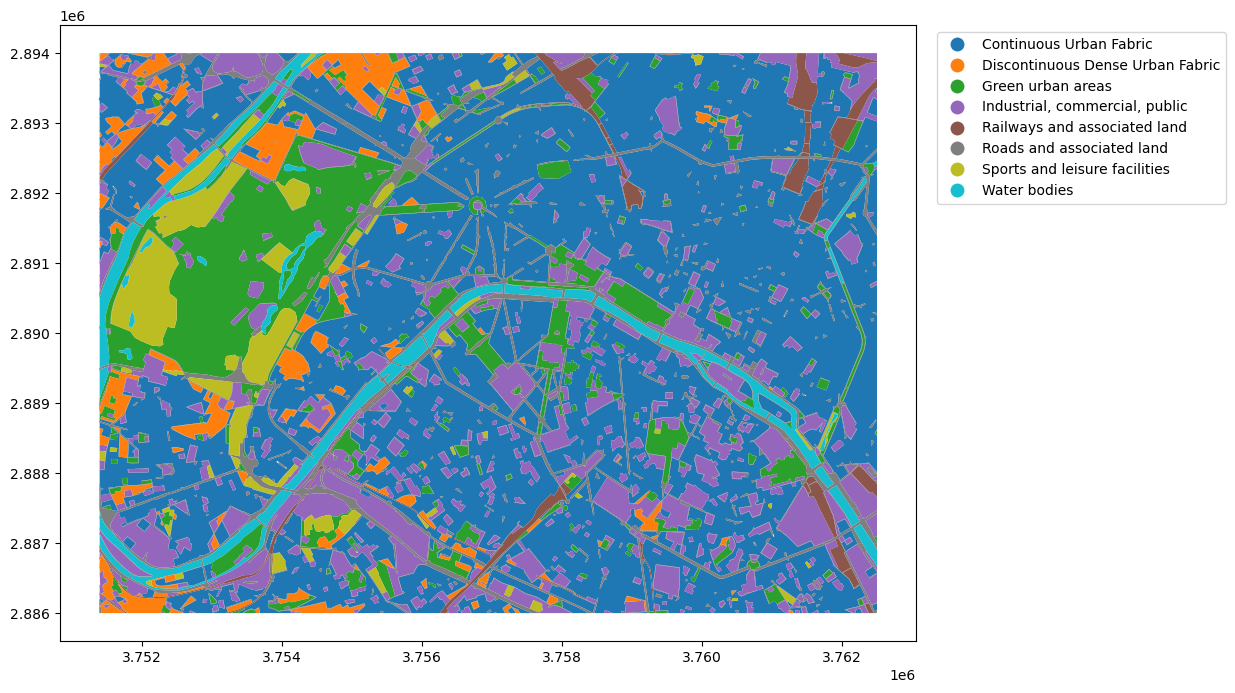

In [47]:
ax = land_use.plot(column = 'class', legend = True, figsize = (12,8))

# Note that this is how to put the legend outside of the plot
# needs a bit of trial and error unfortunately
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.37, 1))

In [48]:
land_use['area'] = land_use.area

land_use

,class,geometry,area
0,Water bodies,"POLYGON ((3751386.281 2890064.323, 3751395.345...",294578.751217
1,Roads and associated land,"POLYGON ((3751390.345 2886000.000, 3751390.345...",5420.710856
2,Roads and associated land,"POLYGON ((3751390.345 2886898.192, 3751390.370...",2949.568985
3,Roads and associated land,"POLYGON ((3751390.345 2887500.000, 3751390.345...",8475.451252
4,Roads and associated land,"POLYGON ((3751390.345 2888647.357, 3751390.370...",400.972555
...,...,...,...
3238,Green urban areas,"POLYGON ((3762500.000 2887018.698, 3762458.012...",1774.638176
3239,Water bodies,"POLYGON ((3762500.000 2892386.959, 3762470.299...",3384.185687
3240,Continuous Urban Fabric,"POLYGON ((3762500.000 2891470.236, 3762467.383...",85544.939178
3241,Continuous Urban Fabric,"POLYGON ((3762500.000 2892463.878, 3762444.008...",12888.005359


In [51]:
# Different areas
land_use.groupby('class')['area'].sum() / 1e6

class
Continuous Urban Fabric             45.943090
Discontinuous Dense Urban Fabric     3.657343
Green urban areas                    9.858438
Industrial, commercial, public      13.295042
Railways and associated land         1.935793
Roads and associated land            7.401574
Sports and leisure facilities        3.578509
Water bodies                         3.189706
Name: area, dtype: float64

In [ ]:
# %load _solutions/05-spatial-operations-overlays4.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays5.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays6.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays7.py

<div class="alert alert-success">

**EXERCISE 3: Intersection of two polygons**

For this exercise, we are going to use 2 individual polygons: the district of Muette extracted from the `districts` dataset, and the green urban area of Boulogne, a large public park in the west of Paris, extracted from the `land_use` dataset. The two polygons have already been assigned to the `muette` and `park_boulogne` variables.

We first visualize the two polygons. You will see that they overlap, but the park is not fully located in the district of Muette. Let's determine the overlapping part:

* Plot the two polygons in a single map to examine visually the degree of overlap
* Calculate the intersection of the `park_boulogne` and `muette` polygons.
* Plot the intersection.
* Print the proportion of the area of the district that is occupied by the park.

<details><summary>Hints</summary>

* To plot single Shapely objects, you can put those in a `GeoSeries([..])` to use the GeoPandas `plot()` method.
* The intersection of to scalar polygons can be calculated with the `intersection()` method of one of the polygons, and passing the other polygon as the argument to that method.

</details>

</div>

In [52]:
land_use = gpd.read_file("data/paris_land_use.zip")
districts = gpd.read_file("data/paris_districts.geojson").to_crs(land_use.crs)

In [53]:
# extract polygons
land_use['area'] = land_use.geometry.area
park_boulogne = land_use[land_use['class'] == "Green urban areas"].sort_values('area').geometry.iloc[-1]
muette = districts[districts.district_name == 'Muette'].geometry.item()

<Axes: >

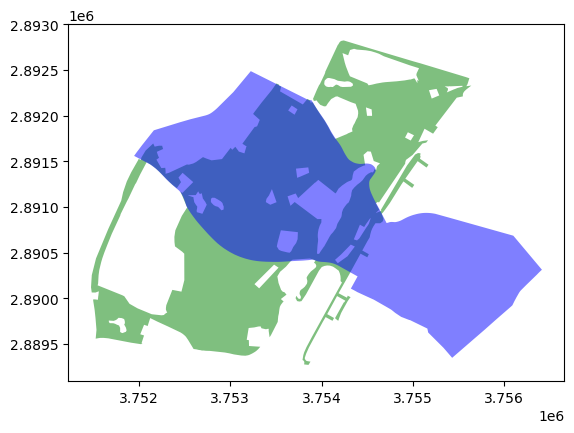

In [56]:
# Plot the two polygons
gpd.GeoSeries([park_boulogne, muette]).plot(alpha=0.5, color=['green', 'blue'])

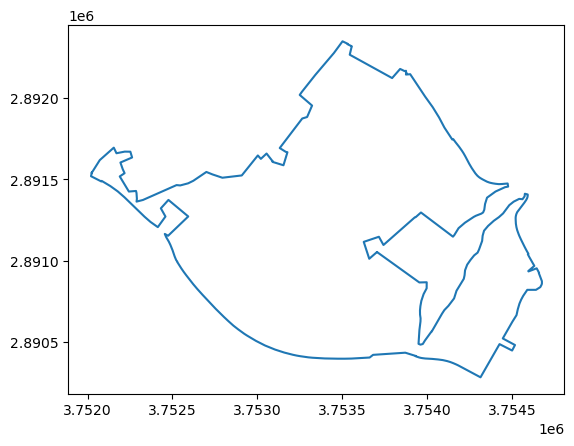

In [59]:
intersection = park_boulogne.intersection(muette)

plt.plot(*intersection.exterior.xy)

<Axes: >

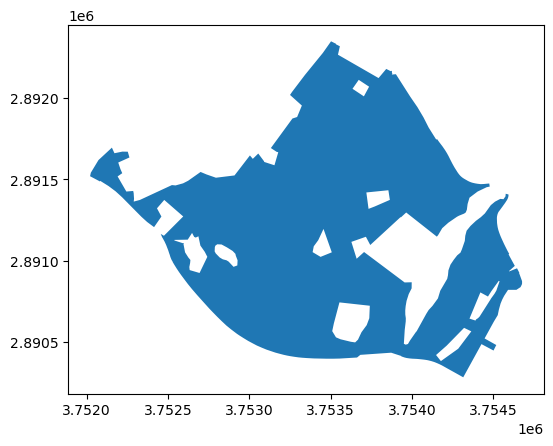

In [63]:
# this is how you plot Polygon objects
gpd.GeoSeries([intersection]).plot()

In [ ]:
# %load _solutions/05-spatial-operations-overlays8.py
# Calculate the intersection of both polygons
intersection = park_boulogne.intersection(muette)

In [ ]:
# %load _solutions/05-spatial-operations-overlays9.py
# Plot the intersection
geopandas.GeoSeries([intersection]).plot()

In [ ]:
# %load _solutions/05-spatial-operations-overlays10.py
# Print proportion of district area that occupied park
print(intersection.area / muette.area)

<div class="alert alert-success">

**EXERCISE 4: Intersecting a GeoDataFrame with a Polygon**

Combining the land use dataset and the districts dataset, we can now investigate what the land use is in a certain district.

For that, we first need to determine the intersection of the land use dataset with a given district. Let's take again the *Muette* district as example case.

* Calculate the intersection of the `land_use` polygons with the single `muette` polygon. Call the result `land_use_muette`.
* Remove the empty geometries from `land_use_muette`.
* Make a quick plot of this intersection, and pass `edgecolor='black'` to more clearly see the boundaries of the different polygons.
* Print the first five rows of `land_use_muette`.

<details><summary>Hints</summary>

* The intersection of each geometry of a GeoSeries with another single geometry can be performed with the `intersection()` method of a GeoSeries.
* The `intersection()` method takes as argument the geometry for which to calculate the intersection.
* We can check which geometries are empty with the `is_empty` attribute of a GeoSeries.
    
</details>

</div>

In [104]:
land_use = gpd.read_file("data/paris_land_use.zip")
districts = gpd.read_file("data/paris_districts.geojson").to_crs(land_use.crs)
muette = districts[districts.district_name == 'Muette'].geometry.item()

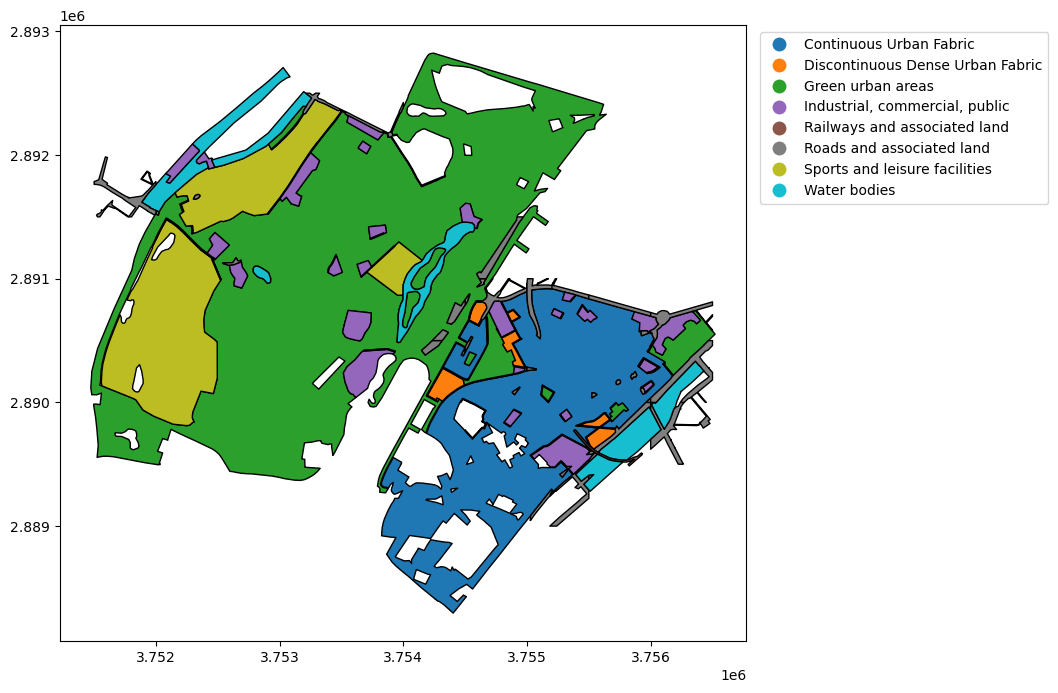

In [116]:
land_use_muette = land_use.intersection(muette)

ax = land_use[~land_use_muette.is_empty].plot(column = 'class', legend = True, edgecolor = 'black', figsize = (12,8))

leg = ax.get_legend()
leg.set_bbox_to_anchor((0.45,0,1,1))

In [119]:
# Create copy of land use dataset
land_use_muette_df = land_use.copy()

# Replace geometry with intersecting geometry
land_use_muette_df['geometry'] = land_use.intersection(muette)

# Remove empty entries
land_use_muette_df = land_use_muette_df[~land_use_muette_df.is_empty]

land_use_muette_df.head()

,class,geometry
135,Green urban areas,"POLYGON ((3752025.310 2891540.731, 3752072.277..."
229,Sports and leisure facilities,"POLYGON ((3752446.430 2891170.014, 3752447.412..."
239,Water bodies,"POLYGON ((3752112.444 2891773.642, 3752112.444..."
278,Roads and associated land,"POLYGON ((3752000.000 2891551.589, 3752025.137..."
279,Roads and associated land,"POLYGON ((3752000.000 2891551.589, 3752000.000..."


<Axes: >

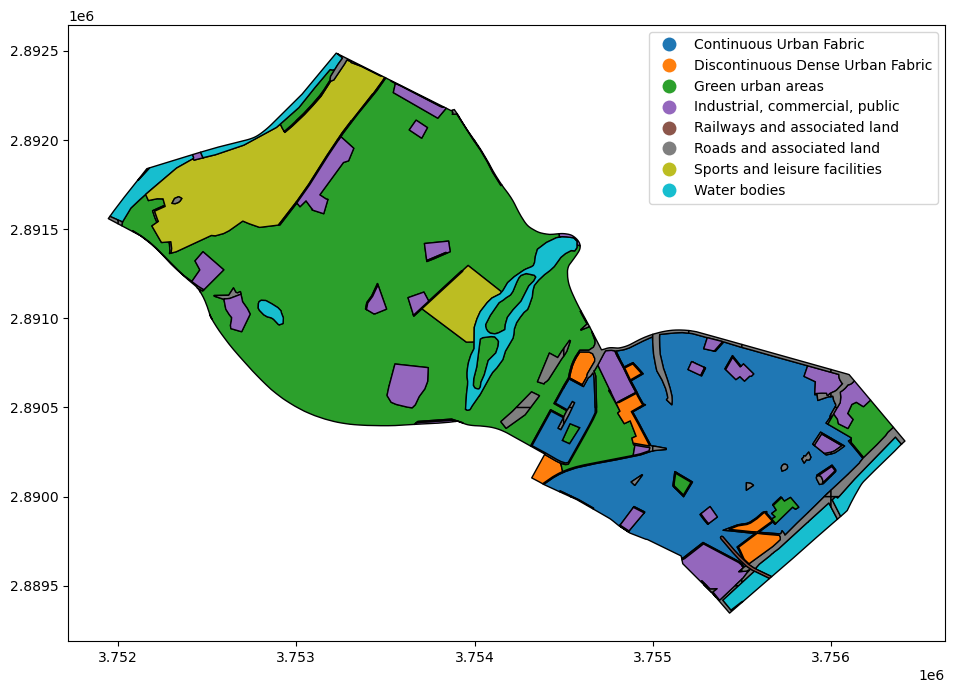

In [120]:
land_use_muette_df.plot(column = 'class', legend = True, edgecolor = 'black', figsize = (12,8))

In [121]:
# Create dataframe of classes
land_use_muette_df.dissolve(by = 'class')

,geometry
class,
Continuous Urban Fabric,"MULTIPOLYGON (((3755337.805 2889454.016, 37553..."
Discontinuous Dense Urban Fabric,"MULTIPOLYGON (((3755714.363 2889771.848, 37557..."
Green urban areas,"MULTIPOLYGON (((3755800.838 2889928.480, 37557..."
"Industrial, commercial, public","MULTIPOLYGON (((3753892.893 2890421.231, 37538..."
Railways and associated land,"POLYGON ((3755560.618 2889585.839, 3755526.244..."
Roads and associated land,"MULTIPOLYGON (((3754494.276 2890182.333, 37544..."
Sports and leisure facilities,"MULTIPOLYGON (((3753932.355 2891267.190, 37539..."
Water bodies,"MULTIPOLYGON (((3755393.448 2889418.312, 37555..."


In [112]:
# %load _solutions/05-spatial-operations-overlays11.py
# Calculate the intersection of the land use polygons with Muette
land_use_muette = land_use.geometry.intersection(muette)

In [113]:
# %load _solutions/05-spatial-operations-overlays12.py
# Print the first five rows of the intersection
land_use_muette.head()

0    POLYGON EMPTY
1    POLYGON EMPTY
2    POLYGON EMPTY
3    POLYGON EMPTY
4    POLYGON EMPTY
dtype: geometry

In [114]:
# %load _solutions/05-spatial-operations-overlays13.py
# Remove the empty geometries
land_use_muette = land_use_muette[~land_use_muette.is_empty]

In [115]:
# %load _solutions/05-spatial-operations-overlays14.py
# Print the first five rows of the intersection
land_use_muette.head()

135    POLYGON ((3752025.310 2891540.731, 3752072.277...
229    POLYGON ((3752446.430 2891170.014, 3752447.412...
239    POLYGON ((3752112.444 2891773.642, 3752112.444...
278    POLYGON ((3752000.000 2891551.589, 3752025.137...
279    POLYGON ((3752000.000 2891551.589, 3752000.000...
dtype: geometry

In [ ]:
# %load _solutions/05-spatial-operations-overlays15.py

You can see in the plot that we now only have a subset of the full land use dataset. The original `land_use_muette` (before removing the empty geometries) still has the same number of rows as the original `land_use`, though. But many of the rows, as you could see by printing the first rows, consist now of empty polygons when it did not intersect with the Muette district.

The `intersection()` method also returned only geometries. If we want to combine those intersections with the attributes of the original land use, we can take a copy of this and replace the geometries with the intersections (you can uncomment and run to see the code):

In [101]:
# %load _solutions/05-spatial-operations-overlays16.py
land_use_muette_df = land_use.copy()
land_use_muette_df['geometry'] = land_use.geometry.intersection(muette)
land_use_muette_df = land_use_muette_df[~land_use_muette_df.is_empty]
land_use_muette.head()

0    POLYGON EMPTY
1    POLYGON EMPTY
2    POLYGON EMPTY
3    POLYGON EMPTY
4    POLYGON EMPTY
dtype: geometry

<Axes: >

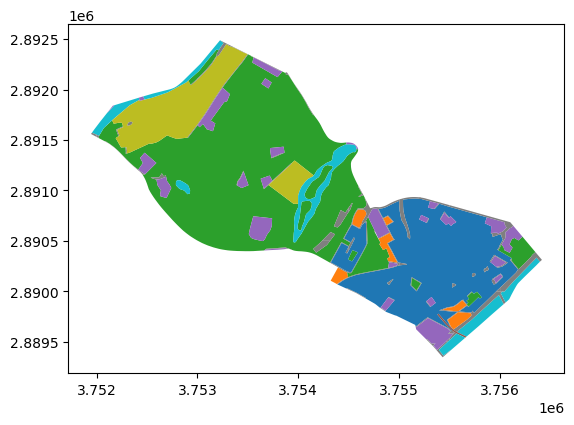

In [102]:
# %load _solutions/05-spatial-operations-overlays17.py
land_use_muette_df.plot(column="class") #edgecolor="black")

In [ ]:
# %load _solutions/05-spatial-operations-overlays18.py
land_use_muette_df.dissolve(by='class')

<div class="alert alert-success">

**EXERCISE 5: The land use of the Muette district**

Based on the `land_use_muette` dataframe with the land use for the Muette districts as calculated above, we can now determine the total area of the different land use classes in the Muette district.

* Calculate the total area per land use class.
* Calculate the fraction (in percentage) for the different land use classes.

<details><summary>Hints</summary>

* The intersection of each geometry of a GeoSeries with another single geometry can be performed with the `intersection()` method of a GeoSeries.
* The `intersection()` method takes as argument the geometry for which to calculate the intersection.
* We can check which geometries are empty with the `is_empty` attribute of a GeoSeries.
    
</details>

</div>

In [125]:
land_classes_muette = land_use_muette_df.dissolve(by = 'class')

land_classes_muette['area'] = land_classes_muette.area / 1e6

land_classes_muette 

,geometry,area
class,,
Continuous Urban Fabric,"MULTIPOLYGON (((3755337.805 2889454.016, 37553...",1.275297
Discontinuous Dense Urban Fabric,"MULTIPOLYGON (((3755714.363 2889771.848, 37557...",0.088289
Green urban areas,"MULTIPOLYGON (((3755800.838 2889928.480, 37557...",2.624229
"Industrial, commercial, public","MULTIPOLYGON (((3753892.893 2890421.231, 37538...",0.362990
Railways and associated land,"POLYGON ((3755560.618 2889585.839, 3755526.244...",0.005424
Roads and associated land,"MULTIPOLYGON (((3754494.276 2890182.333, 37544...",0.225978
Sports and leisure facilities,"MULTIPOLYGON (((3753932.355 2891267.190, 37539...",0.603989
Water bodies,"MULTIPOLYGON (((3755393.448 2889418.312, 37555...",0.292194


In [ ]:
# %load _solutions/05-spatial-operations-overlays19.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays20.py

The above was only for a single district. If we want to do this more easily for all districts, we can do this with the overlay operation.

## The overlay operation

In a spatial join operation, we are not changing the geometries itself. We are not joining geometries, but joining attributes based on a spatial relationship between the geometries. This also means that the geometries need to at least overlap partially.

If you want to create new geometries based on joining (combining) geometries of different dataframes into one new dataframe (eg by taking the intersection of the geometries), you want an **overlay** operation.

### How does it differ compared to the intersection method?

With the `intersection()` method introduced in the previous section, we could for example determine the intersection of a set of countries with another polygon, a circle in the example below:

<img width="70%" src="../img/geopandas/chapter3-overlay-countries-circle-intersection-new.png"/>

However, this method (`countries.intersection(circle)`) also has some limitations.

* Mostly useful when intersecting a GeoSeries with a single polygon.
* Does not preserve attribute information of the intersecting polygons.

For cases where we require a bit more complexity, it is preferable to use the "overlay" operation, instead of the intersection method.

Consider the following simplified example. On the left we see again the 3 countries. On the right we have the plot of a GeoDataFrame with some simplified geologic regions for the same area:

<table width="80%"><tr>
<td> <img src="../img/geopandas/chapter3-overlay-countries.png"/> </td>
<td> <img src="../img/geopandas/chapter3-overlay-regions.png"/> </td>
</tr></table>

By simply plotting them on top of each other, as shown below, you can see that the polygons of both layers intersect. 

But now, by "overlaying" the two layers, we can create a third layer that contains the result of intersecting both layers: all the intersections of each country with each geologic region. It keeps only those areas that were included in both layers.

<table width="80%"><tr>
<td> <img src="../img/geopandas/chapter3-overlay-both.png"/> </td>
<td> <img src="../img/geopandas/chapter3-overlay-overlayed.png"/> </td>
</tr></table>

This operation is called an intersection overlay, and in GeoPandas we can perform this operation with the `geopandas.overlay()` function.

Another code example:

In [126]:
africa = countries[countries['continent'] == 'Africa']

<Axes: >

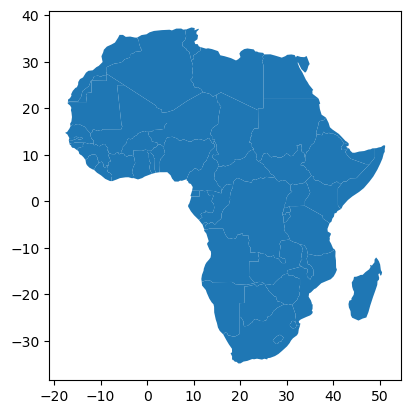

In [127]:
africa.plot()

In [128]:
cities['geometry'] = cities.buffer(2)

C:\Users\tranq\AppData\Local\Temp\ipykernel_11248\1163649495.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cities['geometry'] = cities.buffer(2)


<Axes: >

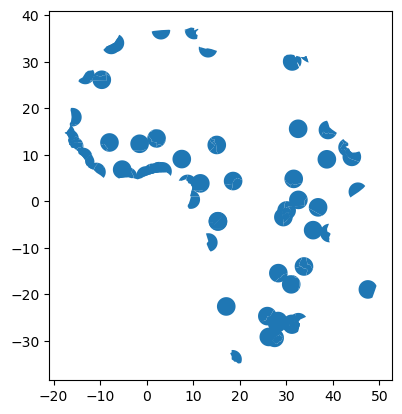

In [129]:
intersection = gpd.overlay(africa, cities, how='intersection')
intersection.plot()

In [130]:
intersection.head()

,iso_a3,name_1,continent,pop_est,gdp_md_est,name_2,geometry
0,AGO,Angola,Africa,29310273.0,189000.0,Brazzaville,"POLYGON ((16.32653 -5.87747, 16.34948 -5.94680..."
1,COD,Dem. Rep. Congo,Africa,83301151.0,66010.0,Brazzaville,"POLYGON ((16.32653 -5.87747, 14.10056 -5.86749..."
2,COG,Congo,Africa,4954674.0,30270.0,Brazzaville,"POLYGON ((15.97280 -2.71239, 16.00629 -3.53513..."
3,AGO,Angola,Africa,29310273.0,189000.0,Luanda,"POLYGON ((13.68638 -10.73108, 13.38733 -10.373..."
4,AGO,Angola,Africa,29310273.0,189000.0,Kinshasa,"POLYGON ((16.32653 -5.87747, 16.37397 -6.02080..."


With the overlay method, we pass the full GeoDataFrame with all regions to intersect the countries with. The result contains all non-empty intersections of all combinations of countries and city regions.

Note that the result of the overlay function also keeps the attribute information of both the countries as the city regions. That can be very useful for further analysis.

In [ ]:
geopandas.overlay(africa, cities, how='intersection').plot()  # how="difference"/"union"/"symmetric_difference"

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b> <br>

* **Spatial join**: transfer attributes from one dataframe to another based on the spatial relationship
* **Spatial overlay**: construct new geometries based on spatial operation between both dataframes (and combining attributes of both dataframes)

</div>

## Let's practice!

<div class="alert alert-success">

**EXERCISE 6: Overlaying spatial datasets I**

We will now combine both datasets in an overlay operation. Create a new `GeoDataFrame` consisting of the intersection of the land use polygons which each of the districts, but make sure to bring the attribute data from both source layers.

* Create a new GeoDataFrame from the intersections of `land_use` and `districts`. Assign the result to a variable `combined`.
* Print the first rows the resulting GeoDataFrame (`combined`).

<details><summary>Hints</summary>

* The intersection of two GeoDataFrames can be calculated with the `geopandas.overlay()` function.
* The `overlay()` functions takes first the two GeoDataFrames to combine, and a third `how` keyword indicating how to combine the two layers.
* For making an overlay based on the intersection, you can pass `how='intersection'`.
* The default `overlay()` call will generate a warning because some of the intersections result in a point or linestring, and thus not in a new polygon. For this exercise, we are only interested in the resulting polygons, and therefore we set `keep_geom_type=True` to suppress the warning and say to `overlay()` we only need the resulting geometries of the same type as the original geometries (thus, only polygons).

</details>

</div>

In [132]:
land_use = gpd.read_file("data/paris_land_use.zip")
districts = gpd.read_file("data/paris_districts.geojson").to_crs(land_use.crs)

display(land_use.head())
display(districts.head())

,class,geometry
0,Water bodies,"POLYGON ((3751386.281 2890064.323, 3751395.345..."
1,Roads and associated land,"POLYGON ((3751390.345 2886000.000, 3751390.345..."
2,Roads and associated land,"POLYGON ((3751390.345 2886898.192, 3751390.370..."
3,Roads and associated land,"POLYGON ((3751390.345 2887500.000, 3751390.345..."
4,Roads and associated land,"POLYGON ((3751390.345 2888647.357, 3751390.370..."


,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((3760188.135 2889260.457, 3760188.075..."
1,2,Halles,8984,"POLYGON ((3760610.022 2889946.422, 3760503.163..."
2,3,Palais-Royal,3195,"POLYGON ((3759905.524 2890194.454, 3759873.112..."
3,4,Place-Vendôme,3044,"POLYGON ((3759388.396 2890559.229, 3759334.824..."
4,5,Gaillon,1345,"POLYGON ((3759742.125 2890864.394, 3759698.189..."


<Axes: >

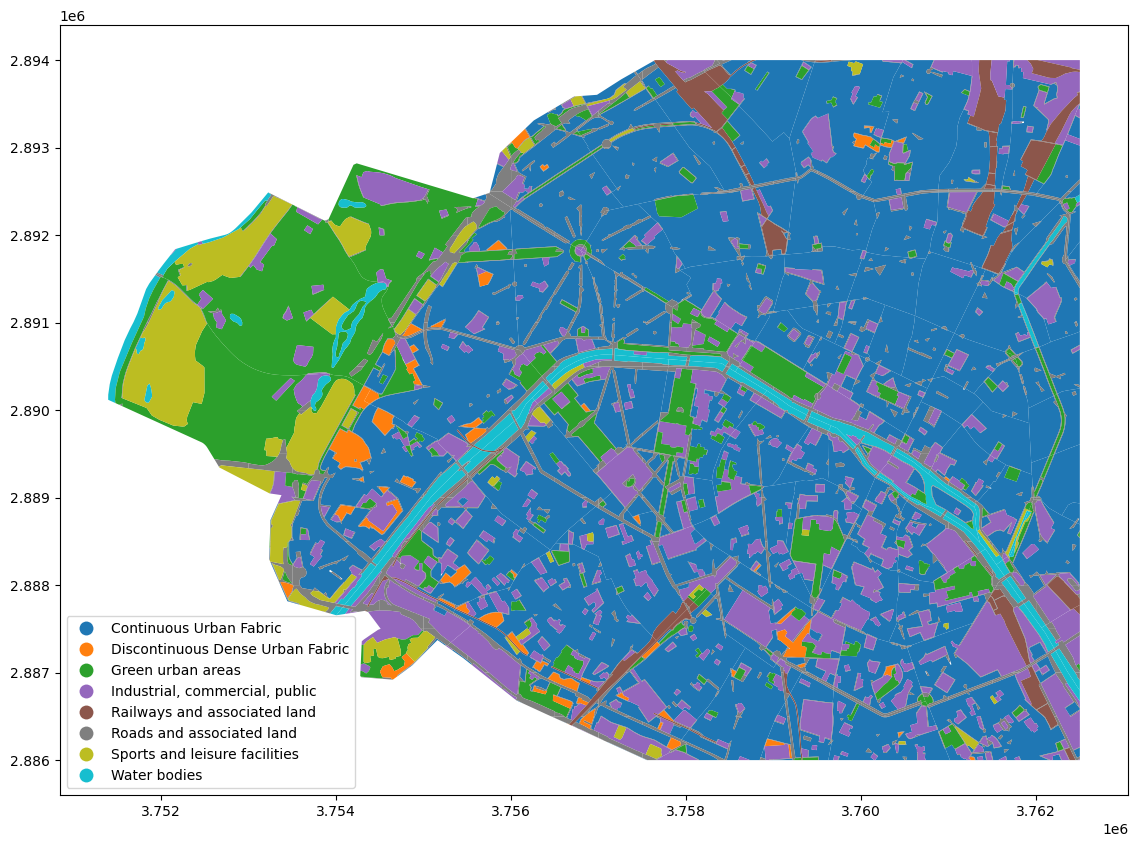

In [154]:
# geom_type warning turns off if keep_geom_type is explicitly called
combined = gpd.overlay(land_use, districts, keep_geom_type=True)

combined.plot(column = 'class', legend = True, figsize = (15, 10), legend_kwds={'loc': 'lower left'})

In [153]:
combined

,class,id,district_name,population,geometry
0,Water bodies,61,Auteuil,67967,"POLYGON ((3751395.345 2890118.002, 3751395.960..."
1,Continuous Urban Fabric,61,Auteuil,67967,"MULTIPOLYGON (((3753263.343 2888249.545, 37532..."
2,Roads and associated land,61,Auteuil,67967,"POLYGON ((3751522.057 2890061.482, 3751558.949..."
3,Green urban areas,61,Auteuil,67967,"MULTIPOLYGON (((3754311.263 2890275.636, 37541..."
4,Roads and associated land,61,Auteuil,67967,"POLYGON ((3751626.627 2890500.000, 3751624.813..."
...,...,...,...,...,...
2976,Continuous Urban Fabric,76,Combat,38988,"POLYGON ((3762384.321 2891648.876, 3762384.321..."
2977,"Industrial, commercial, public",76,Combat,38988,"POLYGON ((3762384.321 2891648.876, 3762361.811..."
2978,Roads and associated land,76,Combat,38988,"POLYGON ((3762482.671 2891500.000, 3762500.000..."
2979,Roads and associated land,76,Combat,38988,"POLYGON ((3762461.784 2891500.000, 3762447.542..."


<Axes: >

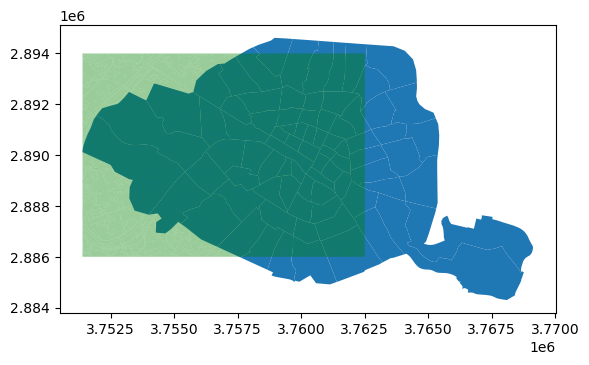

In [138]:
ax = districts.plot()
land_use.plot(alpha = 0.4, ax = ax, color = 'green')

In [148]:
# %load _solutions/05-spatial-operations-overlays21.py
# Overlay both datasets based on the intersection
combined = gpd.overlay(land_use, districts, how='intersection', keep_geom_type=True)

In [149]:
# %load _solutions/05-spatial-operations-overlays22.py
# Print the first five rows of the result
combined.head()

,class,id,district_name,population,geometry
0,Water bodies,61,Auteuil,67967,"POLYGON ((3751395.345 2890118.002, 3751395.960..."
1,Continuous Urban Fabric,61,Auteuil,67967,"MULTIPOLYGON (((3753263.343 2888249.545, 37532..."
2,Roads and associated land,61,Auteuil,67967,"POLYGON ((3751522.057 2890061.482, 3751558.949..."
3,Green urban areas,61,Auteuil,67967,"MULTIPOLYGON (((3754311.263 2890275.636, 37541..."
4,Roads and associated land,61,Auteuil,67967,"POLYGON ((3751626.627 2890500.000, 3751624.813..."


<div class="alert alert-success">

**EXERCISE 7: Overlaying spatial datasets II**

Now that we created the overlay of the land use and districts datasets, we can more easily inspect the land use for the different districts. Let's get back to the example district of Muette, and inspect the land use of that district.

* Add a new column `'area'` with the area of each polygon to the `combined` GeoDataFrame.
* Create a subset called `land_use_muette` where the `'district_name'` is equal to "Muette".
* Make a plot of `land_use_muette`, using the `'class'` column to color the polygons.
* Calculate the total area for each `'class'` of `land_use_muette` using the `groupby()` method, and print the result.

<details><summary>Hints</summary>

* The area of each geometry can be accessed with the `area` attribute of the `geometry` of the GeoDataFrame.
* To use a column to color the geometries, pass its name to the `column` keyword.
* The `groupby()` method takes the column name on which you want to group as the first argument.
* The total area for each class can be calculated by taking the `sum()` of the area.

</details>

</div>

In [159]:
combined['area'] = combined.area / 1e6

combined

,class,id,district_name,population,geometry,area
0,Water bodies,61,Auteuil,67967,"POLYGON ((3751395.345 2890118.002, 3751395.960...",1.207395e-01
1,Continuous Urban Fabric,61,Auteuil,67967,"MULTIPOLYGON (((3753263.343 2888249.545, 37532...",1.940429e-03
2,Roads and associated land,61,Auteuil,67967,"POLYGON ((3751522.057 2890061.482, 3751558.949...",5.459886e-04
3,Green urban areas,61,Auteuil,67967,"MULTIPOLYGON (((3754311.263 2890275.636, 37541...",1.483552e+00
4,Roads and associated land,61,Auteuil,67967,"POLYGON ((3751626.627 2890500.000, 3751624.813...",2.666926e-03
...,...,...,...,...,...,...
2976,Continuous Urban Fabric,76,Combat,38988,"POLYGON ((3762384.321 2891648.876, 3762384.321...",3.844108e-17
2977,"Industrial, commercial, public",76,Combat,38988,"POLYGON ((3762384.321 2891648.876, 3762361.811...",4.266909e-03
2978,Roads and associated land,76,Combat,38988,"POLYGON ((3762482.671 2891500.000, 3762500.000...",9.567206e-04
2979,Roads and associated land,76,Combat,38988,"POLYGON ((3762461.784 2891500.000, 3762447.542...",4.705820e-03


In [160]:
combined[combined['district_name'] == "Muette"].groupby('class')['area'].sum()

class
Continuous Urban Fabric             1.275297
Discontinuous Dense Urban Fabric    0.088289
Green urban areas                   2.624229
Industrial, commercial, public      0.362990
Railways and associated land        0.005424
Roads and associated land           0.226271
Sports and leisure facilities       0.603989
Water bodies                        0.292194
Name: area, dtype: float64

<Axes: >

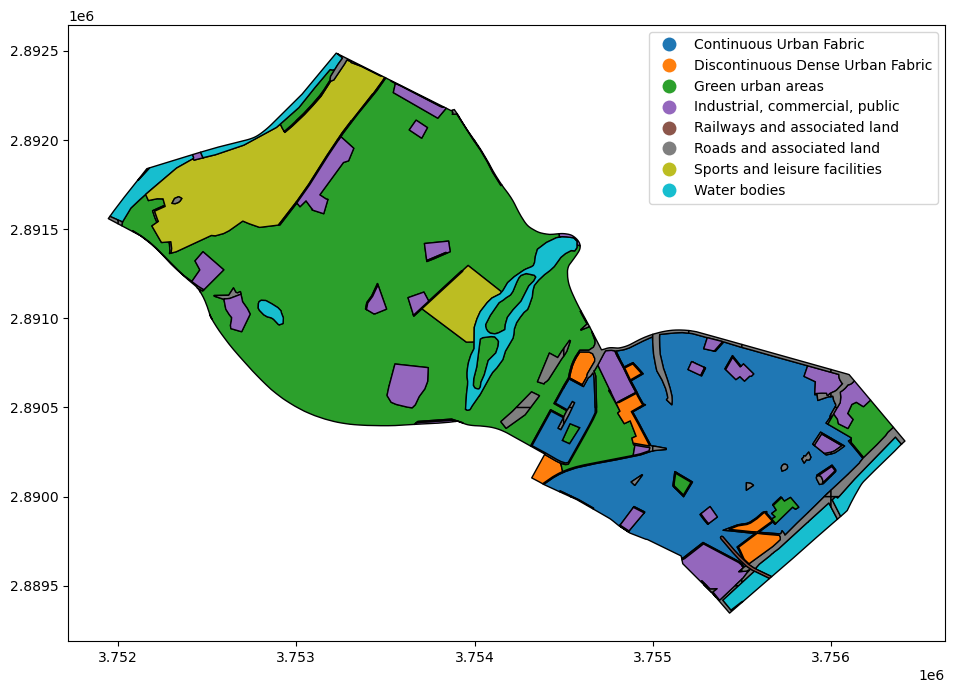

In [161]:
combined[combined['district_name'] == "Muette"].plot(column = 'class', figsize = (12,8), legend = True, edgecolor = 'black')

In [ ]:
# %load _solutions/05-spatial-operations-overlays23.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays24.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays25.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays26.py

<div class="alert alert-success">

**EXERCISE 8: Overlaying spatial datasets III**

Thanks to the result of the overlay operation, we can now more easily perform a similar analysis for *all* districts. Let's investigate the fraction of green urban area in each of the districts.

* Based on the `combined` dataset, calculate the total area per district using `groupby()`.
* Select the subset of "Green urban areas" from `combined` and call this `urban_green`.
* Now calculate the total area per district for this `urban_green` subset, and call this `urban_green_area`.
* Determine the fraction of urban green area in each district.

</div>

In [ ]:
# %load _solutions/05-spatial-operations-overlays27.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays28.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays29.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays30.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays31.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays32.py

An alternative to calculate the area per land use class in each district:

In [ ]:
combined.groupby(["district_name", "class"])["area"].sum().reset_index()